In [280]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=10)
OUTPUTROOT = 'report_6hpd_vs_24nonHPD'
INPUTROOT = 'data_6hpd_vs_24nonHPD'

In [9]:
source('/GCI/jup/A_TSF/dev/lib/yutils.R')
options(repr.plot.width=12
       # , repr.plot.height=8
       )
library(ggsci)
options(repr.matrix.max.rows = 6)
library(maftools)
# install.packages("hrbrthemes")
# install.packages("wesanderson")
# library(wesanderson)
# library(viridis)
# library(hrbrthemes)

In [12]:
WIDTH = 7.5
HEIGHT = 6

In [282]:
glx = yload_dfx('wes_glx',frm=INPUTROOT)
glx

[1] "[ 2023-01-31 07:26:01 ]  read [ wes_glx.dfx ] as ' wes_glx ' from >  data_6hpd_vs_24nonHPD"


a,g,p,order,patient_id,ap,Tumor_Sample_Barcode,Clin_classification,Custom_Label
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
A04569,Pre-HPD,P0104569KY,0,A04569,A04569P0104569KY,HPD_1,Pre-HPD,HPD_1
A05812,Pre-HPD,P0105812,1,A05812,A05812P0105812,HPD_2,Pre-HPD,HPD_2
A06935,Pre-HPD,P010693502,2,A06935,A06935P010693502,HPD_3,Pre-HPD,HPD_3
A11906,Pre-HPD,P01KYA1190602,3,A11906,A11906P01KYA1190602,HPD_4,Pre-HPD,HPD_4
A11907,Pre-HPD,P01KYA1190701,4,A11907,A11907P01KYA1190701,HPD_5,Pre-HPD,HPD_5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
A09227,non-HPD,P010922701,24,A09227,A09227P010922701,PD1_20,non-HPD,PD1_20
A09479,non-HPD,P010947901,24,A09479,A09479P010947901,PD1_21,non-HPD,PD1_21
A09591,non-HPD,P010959101,24,A09591,A09591P010959101,PD1_22,non-HPD,PD1_22


In [160]:
grps = glx$Clin_classification %>% unique
grps

[1] "Pre-HPD" "non-HPD"

In [161]:
data = list()

## fig S5

### a

In [281]:
# %%R
# select group columns
COLS = c('Clin_classification')

# load all wes data
L = list()
for (i in c('snv_all','snv','cnv_all','cnv','glx'
           # ,'armlvl_cnv','armlvl_cnv_all'
            ,'cytoband'
           )) {
    L[[i]] = yload_dfx(paste0('wes_',i),frm = INPUTROOT)
}

glx = L[['glx']]

# set colors
CNV_LEGEND = structure(c("Amplification","Gain","Loss","Deletion")
          ,names=c("Frame_Shift_Ins","In_Frame_Ins","In_Frame_Del","Frame_Shift_Del"))
yset_color_scheme()
ygen_anno_color(glx,cols=COLS)


COL_CNV
COL_SNV
COL_TITV
COL_ANNO

[1] "[ 2023-01-31 01:34:16 ]  read [ wes_snv_all.dfx ] as ' wes_snv_all ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-31 01:34:16 ]  read [ wes_snv.dfx ] as ' wes_snv ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-31 01:34:16 ]  read [ wes_cnv_all.dfx ] as ' wes_cnv_all ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-31 01:34:16 ]  read [ wes_cnv.dfx ] as ' wes_cnv ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-31 01:34:16 ]  read [ wes_glx.dfx ] as ' wes_glx ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-31 01:34:16 ]  read [ wes_cytoband.dfx ] as ' wes_cytoband ' from >  data_6hpd_vs_24nonHPD"
[1] "global var COL_SNV, COL_CNV, COL_TITV have been set."
[1] "global var COL_ANNO has been set."


Frame_Shift_Del           In_Frame_Del        Frame_Shift_Ins 
             "#3653A5"              "#BFC2D7"              "#E21A21" 
          In_Frame_Ins      Missense_Mutation            Splice_Site 
             "#E5B3B8"              "#464E2B"              "#559FCD" 
Translation_Start_Site      Nonsense_Mutation       Nonstop_Mutation 
             "#B2DF8A"              "#33A02C"              "#A8352A" 
               5'Flank              Multi_Hit 
             "#8dd3c7"              "#6B4B98"

Frame_Shift_Del      Missense_Mutation        Frame_Shift_Ins 
             "#A6CEE3"              "#1F78B4"              "#B2DF8A" 
           Splice_Site Translation_Start_Site      Nonsense_Mutation 
             "#33A02C"              "#FB9A99"              "#E31A1C" 
      Nonstop_Mutation           In_Frame_Del           In_Frame_Ins 
             "#FDBF6F"              "#FF7F00"              "#CAB2D6" 
               5'Flank              Multi_Hit 
             "#8dd3c7"              "#6A3D9A"

C>A       C>G       C>T       T>C       T>A       T>G 
"#FF6C91" "#CD9600" "#49B500" "#00C1A9" "#00A9FF" "#E36EF6"

$Clin_classification
    non-HPD     Pre-HPD 
"#E64B35FF" "#4DBBD5FF"

In [206]:
# %%R -w 750
# change these to draw
TOP_GENES = 15
# ------------------------
# PLOT SNV
maf.snv.all = read.maf(L[['snv_all']],L[['glx']])
maf.snv = read.maf(L[['snv']],L[['glx']])
genes.snv = c('TP53','CNN2','SPATA31A3','ADPRH','LILRB1','LRP2','NRG1')# maf.snv %>% getGeneSummary %>% head(TOP_GENES) %>% pull(Hugo_Symbol)

maf.cnv.all = read.maf(L[['cnv_all']],L[['glx']])
maf.cnv = read.maf(L[['cnv']],L[['glx']])
genes.cnv = c("LGALS7","ACTN4","BCL3","CAPN12","DACT3-AS1","DEDD2","ZFP36","HSPB6","POLD4",'ZNF575') #maf.cnv %>% getGeneSummary %>% head(TOP_GENES) %>% pull(Hugo_Symbol)

maf.cyto = read.maf(L[['cytoband']],L[['glx']])
genes.cyto = c('13q12.12','13q12.3','14q21.1','4q32.1','14q21.2')#maf.cyto %>% getGeneSummary %>% head(TOP_GENES) %>% pull(Hugo_Symbol)




-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  FLG
  MUC16
  AHNAK2
-Processing clinical data
-Finished in 0.408s elapsed (6.060s cpu) 
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.070s elapsed (1.371s cpu) 
-Validating
--Removed 778 duplicated variants
-Summarizing
-Processing clinical data
-Finished in 1.588s elapsed (15.8s cpu) 
-Validating
--Removed 25 duplicated variants
-Summarizing
-Processing clinical data
-Finished in 0.098s elapsed (2.132s cpu) 
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.109s elapsed (2.523s cpu) 


In [258]:
.INPUT = list(fu=c(mol='rna_fusion',g='rna_glx')
              ,snv=c(mol='wes_snv_all',g='wes_glx',genes='genes.snv',color='COL_SNV')
              ,cnv=c(mol='wes_cnv_all',g='wes_glx',genes='genes.cnv',color='COL_CNV')
              ,cyto=c(mol='wes_cytoband',g='wes_glx',genes='genes.cyto',color='COL_SNV')
             )
or1 = glx[glx$Clin_classification == 'Pre-HPD', 'Tumor_Sample_Barcode']
or2 = glx[glx$Clin_classification == 'non-HPD', 'Tumor_Sample_Barcode']
or1
or2

[1] "HPD_1" "HPD_2" "HPD_3" "HPD_4" "HPD_5" "HPD_6"

[1] "PD1_1"  "PD1_2"  "PD1_3"  "PD1_4"  "PD1_5"  "PD1_6"  "PD1_7"  "PD1_8" 
 [9] "PD1_9"  "PD1_10" "PD1_11" "PD1_12" "PD1_13" "PD1_14" "PD1_15" "PD1_16"
[17] "PD1_17" "PD1_18" "PD1_19" "PD1_20" "PD1_21" "PD1_22" "PD1_23" "PD1_24"

[1] "[ 2023-01-30 09:14:46 ]  read [ wes_snv_all.dfx ] as ' wes_snv_all ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-30 09:14:46 ]  read [ wes_glx.dfx ] as ' wes_glx ' from >  data_6hpd_vs_24nonHPD"
-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
-Processing clinical data
-Finished in 0.121s elapsed (2.361s cpu) 
-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  FLG
  MUC16
-Processing clinical data
-Finished in 0.396s elapsed (6.316s cpu) 
[1] "Applying filter: Clin_classification == 'Pre-HPD' or 'non-HPD' "
[1] "[!] 4 Global variables set: g1, g2, g1name, g2name"
[1] "[!] Estimate p value for showing is 0.05"


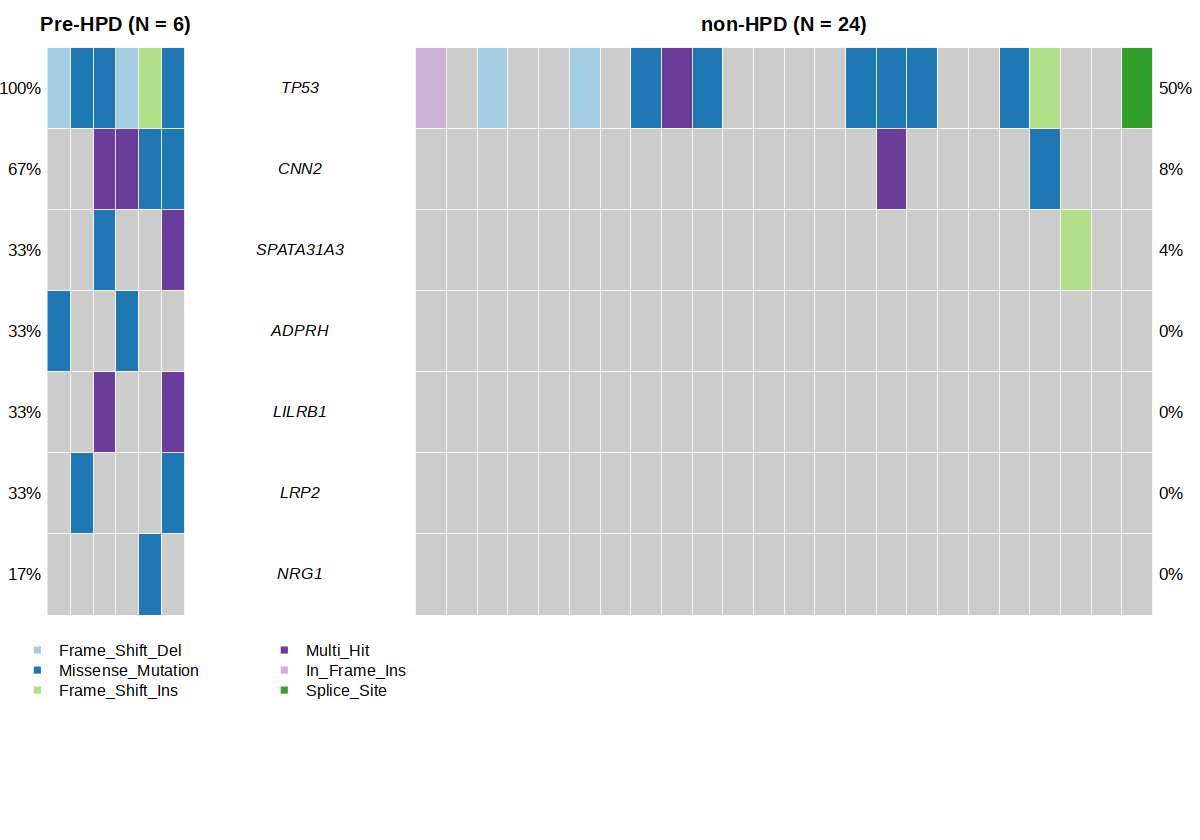

[1] "Global var .res, .data assigned!"


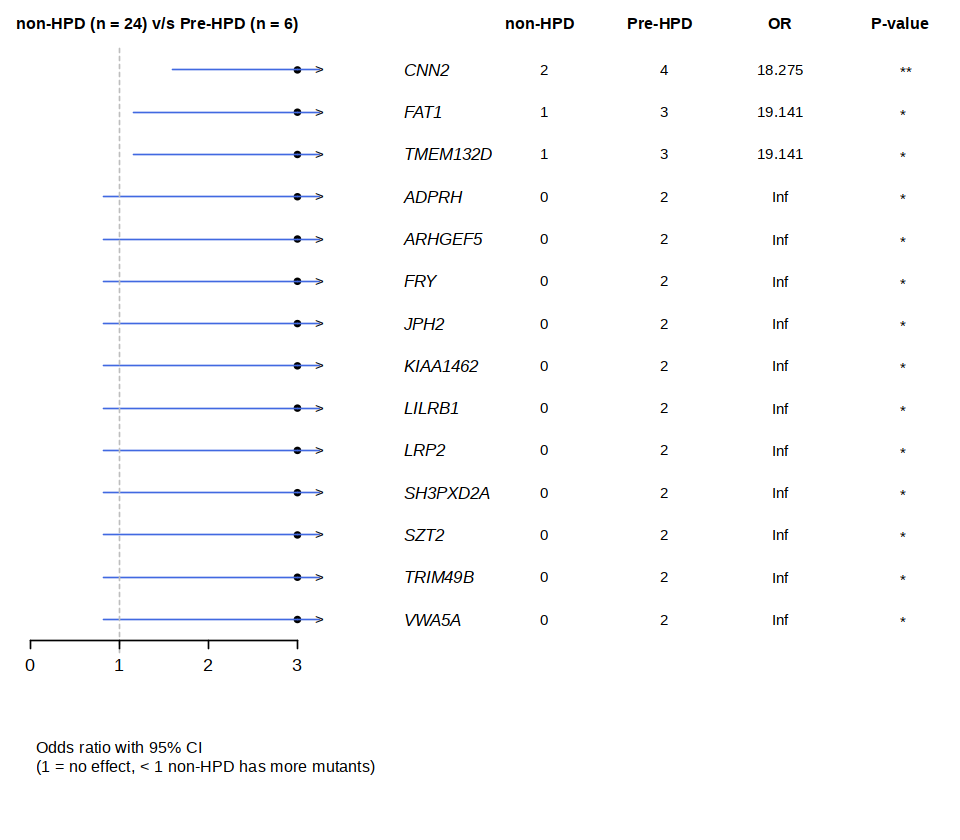

In [265]:
# %%R -w 650
TYPE = 'snv' # c('fu','snv','cnv','cyto')
.res = list()
.data = list()

.data$mol = yload_dfx(.INPUT[[TYPE]]['mol'], frm=INPUTROOT)
.data$glx = yload_dfx(.INPUT[[TYPE]]['g'], frm=INPUTROOT)
if (TYPE %in% c('snv','cnv')){
    .data$sel_genes = get(.INPUT[[TYPE]]['genes'],envir = .GlobalEnv)
    .data$sel_color = get(.INPUT[[TYPE]]['color'],envir = .GlobalEnv)
}
ygen_subMafs_(.data$mol,.data$glx)
# plot coOncoplot
.data$plt.coon = expr(
    coOncoplot(m1 = g1, m2 = g2,sampleOrder1 = or1, sampleOrder2 = or2
               ,gene_mar=1.5
               , m1Name = g1name, m2Name = g2name
               # ,lengend_txt_replace =
               ,genes = .data$sel_genes
               ,removeNonMutated = FALSE
               ,colors = .data$sel_color
              )
)

make.custom(10,7)
# plt.coon %>% ysave('wes','coOncoplot','SNV',outputdir = OUTPUTROOT)
gg.2c1 =.data$plt.coon
eval(.data$plt.coon)


# plot forestplot
.data$g1.vs.g2 = mafCompare(m1 = g1, m2 = g2
                            , m1Name = g1name
                            , m2Name = g2name
                            , minMut = 0)

data$fig2c.snv.cmp = .data$g1.vs.g2$results

.x = .data$g1.vs.g2$results
for(p in c(0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5)){
    n = .x[.x$pval< p,] %>% nrow
    if ( n > 3) break
}
print(paste0('[!] Estimate p value for showing is ',p))
.data$plt.fors = expr(
    forestPlot(.data$g1.vs.g2, pVal = p)
)

make.custom(8,7)
# plt.fors %>% ysave('wes','forestplot','SNV',outputdir = OUTPUTROOT)
eval(.data$plt.fors)
# .g1.vs.g2$results %>% ysave('wes','forestplot','SNV', outputdir = OUTPUTROOT)

.res[[TYPE]] = .data
print('Global var .res, .data assigned!')

In [266]:
make.custom(10,7)
gg.2c1 %>% ysave('figS5A1','snv', outputdir = OUTPUTROOT)


[1] "[ 2023-01-30 09:14:50 ]  write 1 pdf at report_6hpd_vs_24nonHPD/figS5A1_snv.pdf"


[1] "[ 2023-01-30 09:14:50 ]  read [ wes_cnv_all.dfx ] as ' wes_cnv_all ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-30 09:14:50 ]  read [ wes_glx.dfx ] as ' wes_glx ' from >  data_6hpd_vs_24nonHPD"
-Validating
--Removed 150 duplicated variants
-Summarizing
-Processing clinical data
-Finished in 0.507s elapsed (6.508s cpu) 
-Validating
--Removed 628 duplicated variants
-Summarizing
-Processing clinical data
-Finished in 1.343s elapsed (12.8s cpu) 
[1] "Applying filter: Clin_classification == 'Pre-HPD' or 'non-HPD' "
[1] "[!] 4 Global variables set: g1, g2, g1name, g2name"
[1] "[!] Estimate p value for showing is 0.001"


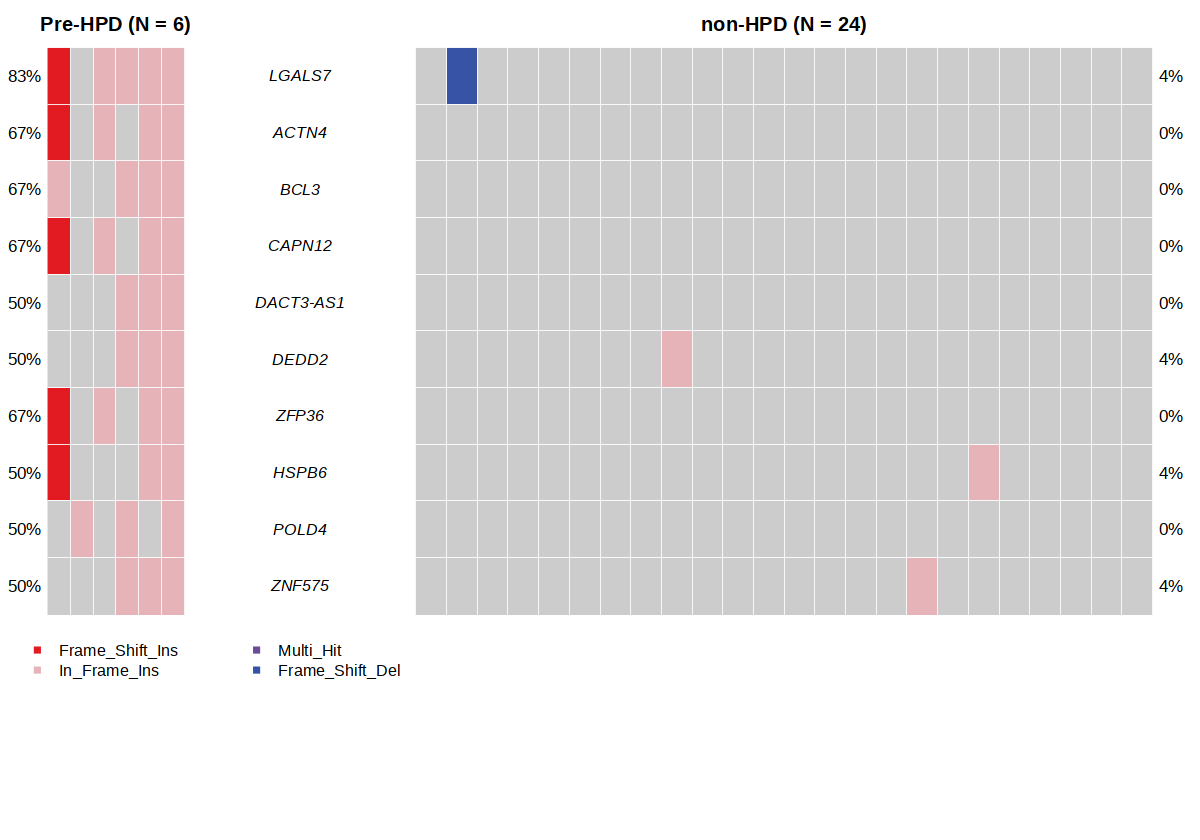

[1] "Global var .res, .data assigned!"


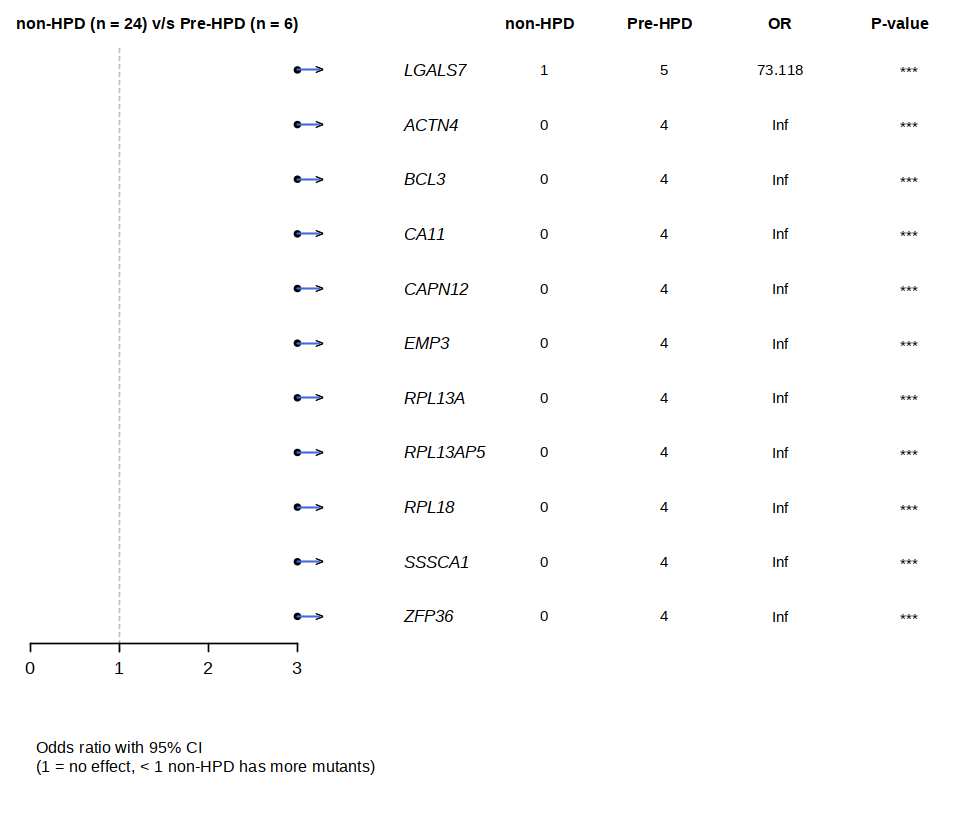

In [267]:
# %%R -w 650
TYPE = 'cnv' # c('fu','snv','cnv')
.res = list()
.data = list()


.data$mol = yload_dfx(.INPUT[[TYPE]]['mol'], frm=INPUTROOT)
.data$glx = yload_dfx(.INPUT[[TYPE]]['g'], frm=INPUTROOT)
if (TYPE %in% c('snv','cnv','cyto')){
    .data$sel_genes = get(.INPUT[[TYPE]]['genes'],envir = .GlobalEnv)
    .data$sel_color = get(.INPUT[[TYPE]]['color'],envir = .GlobalEnv)
}
ygen_subMafs_(.data$mol,.data$glx)
# plot coOncoplot
.data$plt.coon = expr(
    coOncoplot(m1 = g1, m2 = g2,sampleOrder1 = or1, sampleOrder2 = or2
               ,gene_mar=1.5
               , m1Name = g1name, m2Name = g2name
               # ,lengend_txt_replace =
               ,genes = .data$sel_genes
               , removeNonMutated = FALSE
               ,colors = .data$sel_color
              )
)

make.custom(10,7)
# plt.coon %>% ysave('wes','coOncoplot','SNV',outputdir = OUTPUTROOT)
gg.2c2 =.data$plt.coon

eval(.data$plt.coon)


# plot forestplot
.data$g1.vs.g2 = mafCompare(m1 = g1, m2 = g2
                            , m1Name = g1name
                            , m2Name = g2name
                            , minMut = 1)

data$fig2c.cnv.cmp = .data$g1.vs.g2$results

.x = .data$g1.vs.g2$results
for(p in c(0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5)){
    n = .x[.x$pval< p,] %>% nrow
    if ( n > 3) break
}
print(paste0('[!] Estimate p value for showing is ',p))
.data$plt.fors = expr(
    forestPlot(.data$g1.vs.g2, pVal = p)
)

make.custom(8,7)
# plt.fors %>% ysave('wes','forestplot','SNV',outputdir = OUTPUTROOT)
eval(.data$plt.fors)
# .g1.vs.g2$results %>% ysave('wes','forestplot','SNV', outputdir = OUTPUTROOT)

.res[[TYPE]] = .data
print('Global var .res, .data assigned!')

In [268]:
make.custom(10,7)

gg.2c2 %>% ysave('figS5A2','cnv', outputdir = OUTPUTROOT)

[1] "[ 2023-01-30 09:15:04 ]  write 1 pdf at report_6hpd_vs_24nonHPD/figS5A2_cnv.pdf"


[1] "[ 2023-01-30 09:15:04 ]  read [ wes_cytoband.dfx ] as ' wes_cytoband ' from >  data_6hpd_vs_24nonHPD"
[1] "[ 2023-01-30 09:15:04 ]  read [ wes_glx.dfx ] as ' wes_glx ' from >  data_6hpd_vs_24nonHPD"
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.063s elapsed (1.222s cpu) 
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.099s elapsed (2.301s cpu) 
[1] "Applying filter: Clin_classification == 'Pre-HPD' or 'non-HPD' "
[1] "[!] 4 Global variables set: g1, g2, g1name, g2name"
[1] "[!] Estimate p value for showing is 0.01"


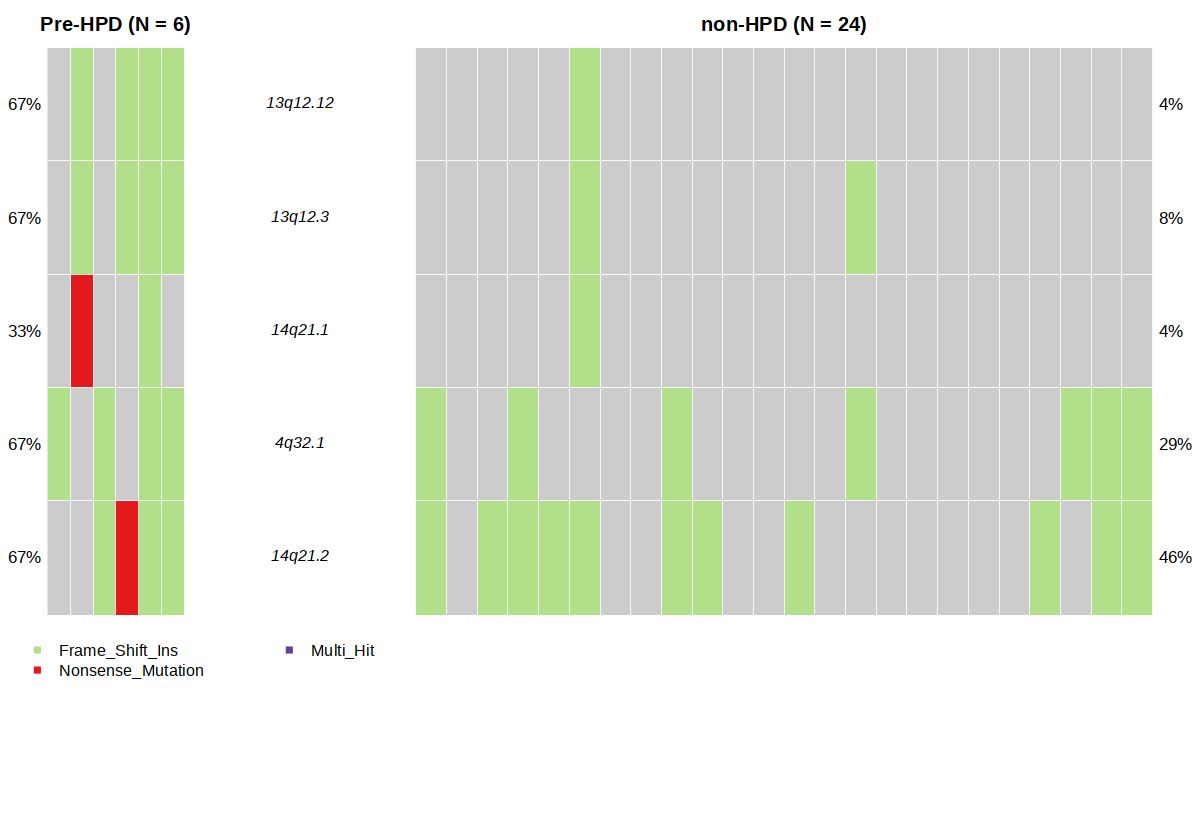

[1] "Global var .res, .data assigned!"


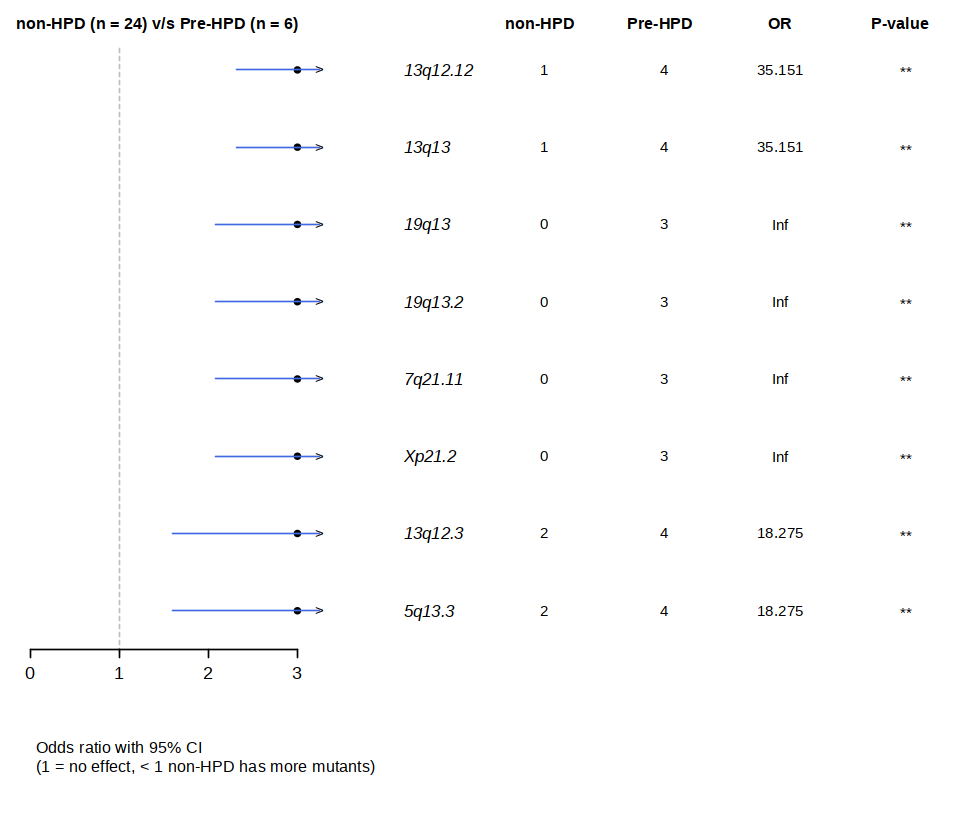

In [269]:
# %%R -w 650
TYPE = 'cyto' # c('fu','snv','cnv','cyto')
.res = list()
.data = list()

.data$mol = yload_dfx(.INPUT[[TYPE]]['mol'], frm=INPUTROOT)
.data$glx = yload_dfx(.INPUT[[TYPE]]['g'], frm=INPUTROOT)
if (TYPE %in% c('snv','cnv','cyto')){
    .data$sel_genes = get(.INPUT[[TYPE]]['genes'],envir = .GlobalEnv)
    .data$sel_color = get(.INPUT[[TYPE]]['color'],envir = .GlobalEnv)
}
ygen_subMafs_(.data$mol,.data$glx)
# plot coOncoplot
.data$plt.coon = expr(
    coOncoplot(m1 = g1, m2 = g2, sampleOrder1 = or1, sampleOrder2 = or2
               ,gene_mar=1.5
               , m1Name = g1name, m2Name = g2name
               # ,lengend_txt_replace =
               ,genes = .data$sel_genes
               , removeNonMutated = FALSE
               ,colors = .data$sel_color
              )
)

make.custom(10,7)
# plt.coon %>% ysave('wes','coOncoplot','SNV',outputdir = OUTPUTROOT)
gg.2c3 =.data$plt.coon
eval(.data$plt.coon)


# plot forestplot
.data$g1.vs.g2 = mafCompare(m1 = g1, m2 = g2
                            , m1Name = g1name
                            , m2Name = g2name
                            , minMut = 1)

data$fig2c.snv.cmp = .data$g1.vs.g2$results

.x = .data$g1.vs.g2$results
for(p in c(0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5)){
    n = .x[.x$pval< p,] %>% nrow
    if ( n > 3) break
}
print(paste0('[!] Estimate p value for showing is ',p))
.data$plt.fors = expr(
    forestPlot(.data$g1.vs.g2, pVal = p)
)

make.custom(8,7)
# plt.fors %>% ysave('wes','forestplot','SNV',outputdir = OUTPUTROOT)
eval(.data$plt.fors)
# .g1.vs.g2$results %>% ysave('wes','forestplot','SNV', outputdir = OUTPUTROOT)

.res[[TYPE]] = .data
print('Global var .res, .data assigned!')

In [270]:
make.custom(10,7)

gg.2c3 %>% ysave('figS5A3','cytoband', outputdir = OUTPUTROOT)


[1] "[ 2023-01-30 09:15:05 ]  write 1 pdf at report_6hpd_vs_24nonHPD/figS5A3_cytoband.pdf"


In [271]:
data$figS5A.snv = L$snv_all
data$figS5A.cnv = L$cnv_all
data$figS5A.cyto = L$cytoband

### b

In [247]:
math = yload_dfx('wes_math',frm=INPUTROOT)
math

[1] "[ 2023-01-30 09:10:18 ]  read [ wes_math.dfx ] as ' wes_math ' from >  data_6hpd_vs_24nonHPD"


a,ap,p,Tumor_Sample_Barcode,Clin_classification,MedianAbsoluteDeviation,MATH
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A04569,A04569P0104569KY,P0104569KY,HPD_1,Pre-HPD,9.280,82.23866
A05812,A05812P0105812,P0105812,HPD_2,Pre-HPD,22.360,90.68783
A06935,A06935P010693502,P010693502,HPD_3,Pre-HPD,6.755,75.67029
A11906,A11906P01KYA1190602,P01KYA1190602,HPD_4,Pre-HPD,3.120,41.26416
A11907,A11907P01KYA1190701,P01KYA1190701,HPD_5,Pre-HPD,18.480,83.83858
⋮,⋮,⋮,⋮,⋮,⋮,⋮
A09198,A09198P010919801,P010919801,PD1_12,non-HPD,2.235,41.62828
A09220,A09220P010922001,P010922001,PD1_13,non-HPD,3.060,47.15963
A09227,A09227P010922701,P010922701,PD1_14,non-HPD,3.100,39.62121


In [249]:
stat.s5b = compare_means(MATH~Clin_classification,data = math) %>% mutate(y.position = 95)
stat.s5b
gg.s5b = math %>% ggplot(aes(y=MATH,x=Clin_classification,color=Clin_classification)) +
    geom_boxplot(fill=NA,width=0.6) +
    geom_point(size=2,color='black',alpha = 0.5) +
    scale_color_manual(values=COL_HPD) +
    theme_classic(base_size = 16) +
    theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none") +
    ylab('MATH Score') +
    ggpubr::stat_pvalue_manual(data = stat.s5b, label = 'p = {p.format}',size = 6)

.y.,group1,group2,p,p.adj,p.format,p.signif,method,y.position
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
MATH,Pre-HPD,non-HPD,0.01334888,0.013,0.013,*,Wilcoxon,95


[1] "[ 2023-01-30 09:10:34 ]  write 1 pdf at report_6hpd_vs_24nonHPD/figS5B_MATH.pdf"


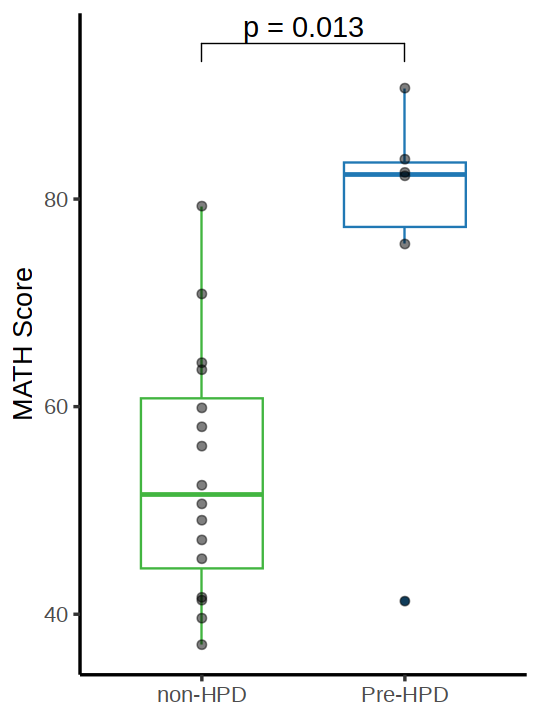

In [250]:
make.custom(4.5,6)
gg.s5b %>% ysave('figS5B','MATH',outputdir = OUTPUTROOT)
gg.s5b

In [251]:
data$figS5b = math

In [276]:
math %>% group_by(Clin_classification) %>% summarise(median(MATH),mean(MATH))

Clin_classification,median(MATH),mean(MATH)
<chr>,<dbl>,<dbl>
non-HPD,51.53301,53.52576
Pre-HPD,82.40428,76.04490


## fig3

### a diff expr volcano

In [72]:
cmp = yload_dfx('rna_cmp_order.dfx',frm=INPUTROOT) %>% pull(1)
cmp

[1] "[ 2023-01-30 05:56:09 ]  read [ rna_cmp_order.dfx ] as ' rna_cmp_order ' from >  data_6hpd_vs_24nonHPD"


[1] "non-HPD_vs_Pre-HPD"

In [73]:
dif = yload_dfx('./data_6hpd_vs_10nonHPD/rna_diffexpr.dfx',na.strings='NA')
dif

[1] "[ 2023-01-30 05:56:09 ]  read [ rna_diffexpr.dfx ] as ' rna_diffexpr ' from >  ./data_6hpd_vs_10nonHPD"


symbol,baseMean,log2FoldChange,log2FC_abs,lfcSE,stat,pvalue,padj,FC_Ins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
MAGEA4,1421.993,9.196282,9.196282,1.489339,6.174740,6.627244e-10,1.864906e-06,TRUE
LGALS7,260.309,8.638115,8.638115,1.613663,5.353111,NA,NA,TRUE
DLK1,3569.468,-8.567444,8.567444,1.529733,-5.600613,2.135949e-08,2.121374e-05,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
EIF6,2618.282,-5.297187e-05,5.297187e-05,0.4787834,-1.106385e-04,0.9999117,0.9999911,FALSE
ZC3H3,3419.065,2.597740e-05,2.597740e-05,0.3916853,6.632212e-05,0.9999471,0.9999911,TRUE
TRIP11,3738.248,-3.812117e-06,3.812117e-06,0.3427030,-1.112368e-05,0.9999911,0.9999911,FALSE


In [74]:
threshold = c(-1.5,1.5)
padj = 0.05

de = dif %>% filter(!is.na(log2FC_abs) & !is.na(pvalue)) %>% 
    mutate(minus.log10pajd = -log10(padj),diffexpressed ="NO", delabel = "")

de$diffexpressed[de$log2FoldChange > threshold[2] & de$padj < padj] <- "UP"
de$diffexpressed[de$log2FoldChange < threshold[1] & de$padj < padj] <- "DOWN"
de$diffexpressed = factor(de$diffexpressed,levels=c('UP','NO','DOWN'))

de$delabel[de$diffexpressed != "NO"] = de$symbol[de$diffexpressed != "NO"]


xlimits_right = de$log2FC_abs %>% max 
xlimits_right = xlimits_right %>% round(2)

de

symbol,baseMean,log2FoldChange,log2FC_abs,lfcSE,stat,pvalue,padj,FC_Ins,minus.log10pajd,diffexpressed,delabel
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<fct>,<chr>
MAGEA4,1421.9933,9.196282,9.196282,1.489339,6.174740,6.627244e-10,1.864906e-06,TRUE,5.729343,UP,MAGEA4
DLK1,3569.4683,-8.567444,8.567444,1.529733,-5.600613,2.135949e-08,2.121374e-05,FALSE,4.673383,DOWN,DLK1
MAGEA1,360.7538,7.370811,7.370811,1.253332,5.880973,4.078613e-09,8.287402e-06,TRUE,5.081582,UP,MAGEA1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
EIF6,2618.282,-5.297187e-05,5.297187e-05,0.4787834,-1.106385e-04,0.9999117,0.9999911,FALSE,3.854558e-06,NO,
ZC3H3,3419.065,2.597740e-05,2.597740e-05,0.3916853,6.632212e-05,0.9999471,0.9999911,TRUE,3.854558e-06,NO,
TRIP11,3738.248,-3.812117e-06,3.812117e-06,0.3427030,-1.112368e-05,0.9999911,0.9999911,FALSE,3.854558e-06,NO,


In [75]:
gg.3a = ggplot(data=de, aes(x=log2FoldChange, y = minus.log10pajd,color =diffexpressed,label=delabel)) + 
    geom_point(alpha=0.5,size=4) + 
    theme_minimal() +
    scale_color_manual(values=c("red", "gray", "blue")) +
    geom_vline(xintercept=threshold, col="black",linetype='longdash') +
    geom_hline(yintercept=-log10(padj), col="black",linetype='longdash') +
    xlim(-xlimits_right,xlimits_right) + 
    ylab('-log10(pvalue)') +
    ggtitle(label = cmp) + 
    ggrepel::geom_text_repel(box.padding = 0, point.padding = 0, nudge_y = 0.5, max.overlaps = 5)


In [76]:
data$fig3a = de

Warning message:
“Removed 1051 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1051 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 859 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "[ 2023-01-30 05:56:14 ]  write 1 pdf at report_6hpd_vs_24nonHPD/fig3A.pdf"


Warning message:
“Removed 1051 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1051 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 865 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


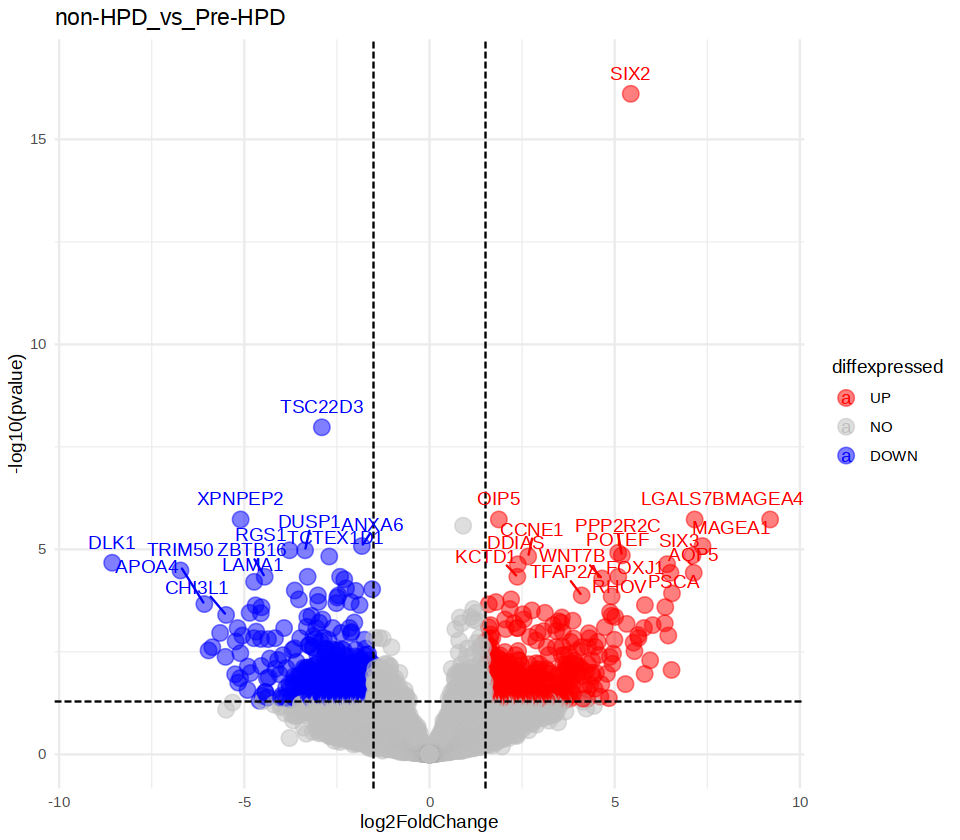

In [77]:
make.custom(8,7)
gg.3a %>% ysave('fig3A',outputdir=OUTPUTROOT)
gg.3a

In [78]:
de

symbol,baseMean,log2FoldChange,log2FC_abs,lfcSE,stat,pvalue,padj,FC_Ins,minus.log10pajd,diffexpressed,delabel
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<fct>,<chr>
MAGEA4,1421.9933,9.196282,9.196282,1.489339,6.174740,6.627244e-10,1.864906e-06,TRUE,5.729343,UP,MAGEA4
DLK1,3569.4683,-8.567444,8.567444,1.529733,-5.600613,2.135949e-08,2.121374e-05,FALSE,4.673383,DOWN,DLK1
MAGEA1,360.7538,7.370811,7.370811,1.253332,5.880973,4.078613e-09,8.287402e-06,TRUE,5.081582,UP,MAGEA1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
EIF6,2618.282,-5.297187e-05,5.297187e-05,0.4787834,-1.106385e-04,0.9999117,0.9999911,FALSE,3.854558e-06,NO,
ZC3H3,3419.065,2.597740e-05,2.597740e-05,0.3916853,6.632212e-05,0.9999471,0.9999911,TRUE,3.854558e-06,NO,
TRIP11,3738.248,-3.812117e-06,3.812117e-06,0.3427030,-1.112368e-05,0.9999911,0.9999911,FALSE,3.854558e-06,NO,


### b gsea

In [79]:
res.gsea = ydo_gsea(diff = dif)
res.gsea %>% names

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



[1] "after filter, 31 results left"


preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



[1] "after filter, 61 results left"


[1] "hm"   "kegg"

In [80]:
res.gsea$hm$figsize

[1] 11.0 11.5

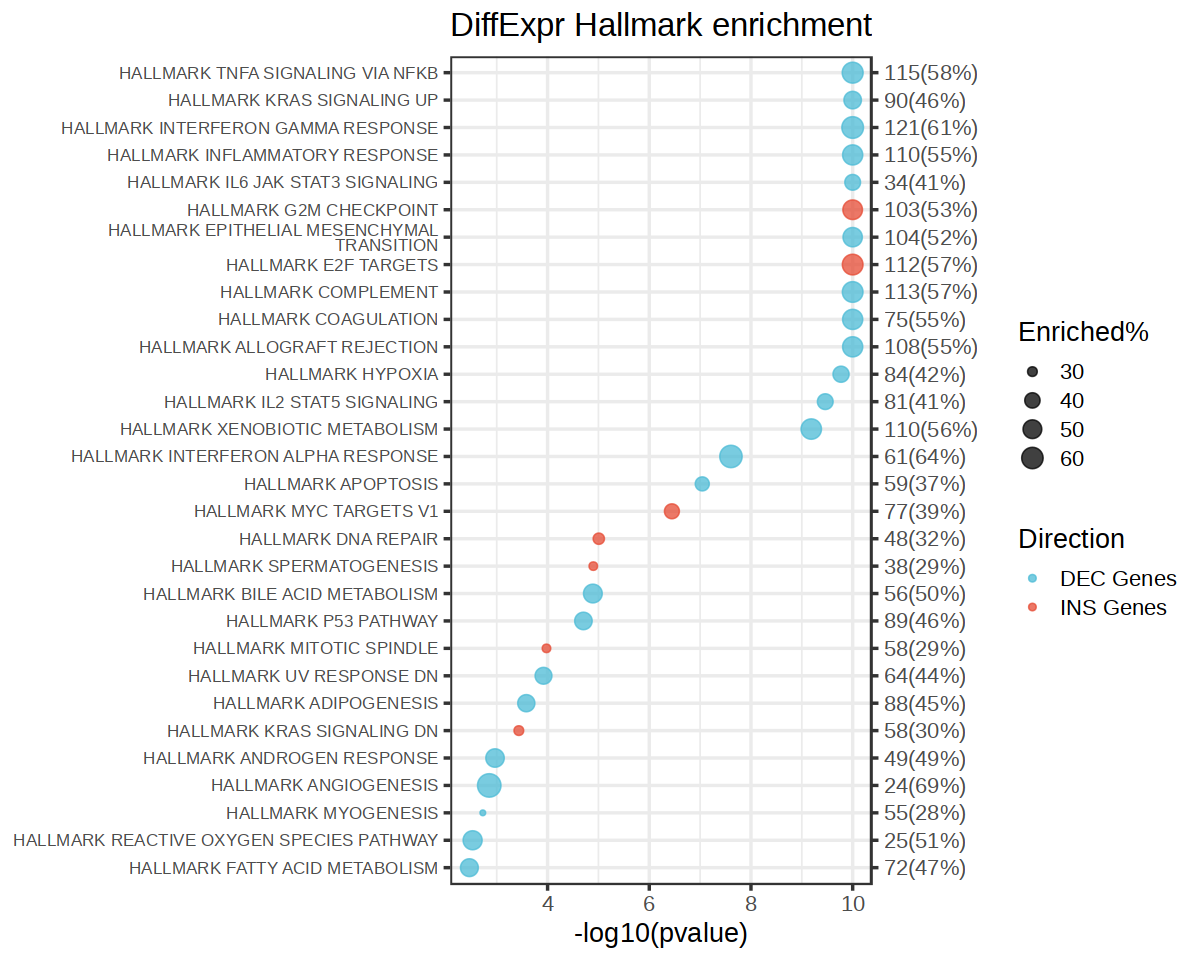

In [81]:
make.custom(10,8)
gg = res.gsea$hm$gg
gg


In [82]:
data$fig3b.hm = res.gsea$hm$tb.gsea
data$fig3b.hm

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,EnrichedGeneNum,direction,EnrichedPer
,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>,<dbl>
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,195,-0.6204687,-3.073178,1e-10,4.545455e-10,1.722488e-10,3251,"tags=55%, list=18%, signal=46%",IL15/RPL9/HLA-DQA1/F2R/ETS1/INHBA/CXCL9/SOCS1/IL27RA/IL4/TAPBP/TIMP1/FLNA/GPR65/ELANE/CCL19/JAK2/PRKCB/CD40LG/IL9/IL13/CCL13/HLA-DOB/IL4R/CD28/RPS9/CCL2/IFNG/ZAP70/LCK/IL2/CCL7/CCL22/IL2RA/IRF8/THY1/CCR5/CXCR3/CD8B/CD80/MMP9/FYB1/LCP2/CSF1/CD8A/CD86/TLR2/HLA-DMB/CCR2/CTSS/RPS3A/ST8SIA4/SIT1/SPI1/CD2/HLA-DOA/IL10/FCGR2B/ITGAL/CD96/HLA-DRA/CD3D/IL12RB1/CXCL13/HLA-DMA/STAB1/BCAT1/FASLG/TRAT1/IFNGR1/CCR1/HLA-A/LY86/CD3E/CD7/CRTAM/CCL5/CD3G/STAT4/PTPRC/IL18RAP/CD247/CD74/CD1D/CCL11/NCF4/IL2RB/GZMB/IL12B/CCL4/GZMA/IL16/WAS/NLRP3/B2M/IL6/FAS/CFP/ITGB2/CD4/HLA-E/PRF1/ITK/NCR1/FGR/CCND2/SRGN/KLRD1,108,DEC Genes,55
HALLMARK_COAGULATION,HALLMARK_COAGULATION,HALLMARK_COAGULATION,136,-0.4985341,-2.341301,1e-10,4.545455e-10,1.722488e-10,4895,"tags=55%, list=26%, signal=41%",HNF4A/CPB2/GSN/F8/WDR1/C8A/FGG/PDGFB/ITIH1/PLAU/SERPINE1/ANG/MASP2/FN1/F2/FGA/ACOX2/ISCU/SERPINC1/TF/PLG/SERPINA1/OLR1/P2RY1/SERPINB2/CLU/COMP/PROC/TIMP1/PRSS23/CPN1/KLKB1/APOC3/MMP14/MMP8/BMP1/C1S/F11/CFI/C1R/C3/RGN/THBS1/KLF7/C9/FYN/F2RL2/MST1/FBN1/MMP9/LGMN/CTSO/SERPING1/LRP1/SPARC/CPQ/MMP2/APOC1/CTSB/CFD/CSRP1/PROZ/A2M/HTRA1/TIMP3/F12/APOA1/RAPGEF3/THBD/CTSK/F10/MEP1A/C1QA/PLEK/VWF,75,DEC Genes,55
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,199,-0.5030979,-2.491813,1e-10,4.545455e-10,1.722488e-10,4414,"tags=57%, list=24%, signal=44%",ITGAM/CASP7/DOCK9/PRKCD/PRSS36/HNF4A/F8/SH2B3/PCSK9/EHD1/APOBEC3F/SIRT6/XPNPEP1/PDGFB/ITIH1/CR2/HSPA5/SERPINE1/ANG/FN1/RASGRP1/MSRB1/F2/S100A12/AKAP10/C4BPB/RHOG/F7/TIMP2/IRF1/GNG2/SERPINC1/ANXA5/PLG/SERPINA1/PSMB9/OLR1/ZFPM2/SERPINB2/CLU/PRCP/CBLB/GNB4/TIMP1/KLKB1/JAK2/ZEB1/MMP14/MMP8/CD40LG/C1S/IRF2/S100A9/GNAI2/KLK1/C1R/C3/CTSC/PLAUR/PLA2G7/USP15/ATOX1/C9/STX4/CTSD/HSPA1A/FYN/LCK/CASP1/CASP10/CD55/LAP3/CASP5/LIPA/PLA2G4A/LGMN/DGKH/LCP2/CTSO/SERPING1/ERAP2/CTSL/APOBEC3G/LRP1/CPQ/C1QC/APOC1/CTSS/CTSB/DOCK10/CSRP1/PHEX/FCER1G/TNFAIP3/GNGT2/FCN1/COL4A2/CCL5/CEBPB/F10/C1QA/GZMB/CR1/GZMA/CD36/WAS/IL6/NOTCH4/PLEK/LTF/GZMK/PIM1/APOA4,113,DEC Genes,57
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,49,-0.4409588,-1.729826,0.002980772,0.005139262,0.001947510,6060,"tags=51%, list=33%, signal=34%",GPX4/NDUFS2/FES/SOD1/HMOX2/TXNRD2/TXN/PRDX2/SBNO2/PRNP/PRDX4/SELENOS/OXSR1/PRDX6/CAT/ATOX1/GLRX/GPX3/SOD2/MPO/IPCEF1/LSP1/JUNB/MSRA/FTL,25,DEC Genes,51
HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,154,-0.3211659,-1.523584,0.003448139,0.005746899,0.002177772,6299,"tags=47%, list=34%, signal=31%",PTPRG/RDH11/REEP6/HMGCS1/UROS/OSTC/HPGD/S100A10/RETSAT/ENO3/CRAT/ACAA2/ECHS1/YWHAH/CRYZ/PPARA/MCEE/CPOX/FMO1/DLST/ALDH9A1/PCBD1/HSD17B11/BCKDHB/ETFDH/PDHA1/EPHX1/PSME1/ALAD/HMGCL/LDHA/CYP1A1/UBE2L6/SERINC1/D2HGDH/SUCLA2/DECR1/HADH/MLYCD/ACADS/RDH16/MAOA/PRDX6/IL4I1/GPD1/ACOT2/RAP1GDS1/TDO2/GCDH/GAD2/SUCLG2/CA4/LGALS1/CA6/ACADVL/GRHPR/FABP1/HSD17B7/ACAA1/HSD17B4/ACSL5/ACSL1/AQP7/FABP2/AUH/INMT/GLUL/G0S2/CD1D/CD36/GABARAPL1/AOC3,72,DEC Genes,47
HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_CHOLESTEROL_HOMEOSTASIS,73,-0.3554742,-1.499198,0.011557956,0.018641864,0.007064285,4422,"tags=30%, list=24%, signal=23%",S100A11/PDK3/LDLR/ERRFI1/TP53INP1/CXCL16/ANXA5/CLU/PLAUR/ACTG1/GPX8/HSD17B7/CTNNB1/LGMN/GSTM2/STARD4/NFIL3/ANTXR2/PNRC1/LPL/ADH4/ATF3,22,DEC Genes,30


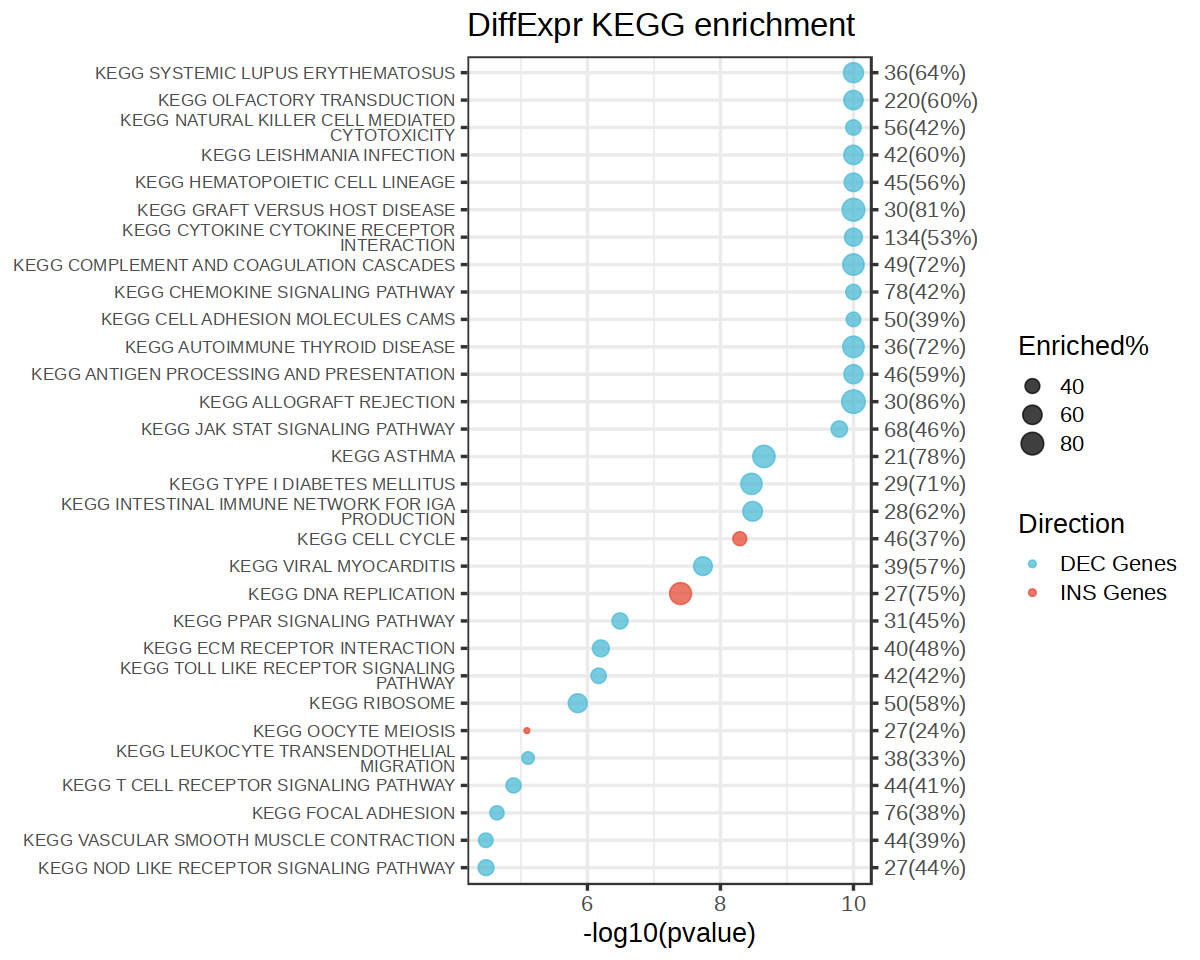

In [83]:
res.gsea$kegg$gg

In [84]:
data$fig3b.kegg = res.gsea$kegg$tb.gsea



### c IL6


In [86]:
rna_norm = yload_dfx('rna_normd',frm=INPUTROOT)

[1] "[ 2023-01-30 05:56:25 ]  read [ rna_normd.dfx ] as ' rna_normd ' from >  data_6hpd_vs_24nonHPD"


In [87]:
rna_glx = yload_dfx('rna_glx',frm=INPUTROOT)

[1] "[ 2023-01-30 05:56:25 ]  read [ rna_glx.dfx ] as ' rna_glx ' from >  data_6hpd_vs_24nonHPD"


In [88]:
genes = data$fig3b.hm['HALLMARK_IL6_JAK_STAT3_SIGNALING','core_enrichment'] %>% str_split('/') %>%`[[`(1)
genes %>% head

[1] "MYD88"  "LEPR"   "DNTT"   "IL4R"   "IL17RA" "JUN"

In [89]:
map = rna_glx %>% pull(g,name = Tumor_Sample_Barcode)

In [90]:
normd = rna_norm %>% filter(symbol%in%genes) %>% pivot_longer(!symbol,values_to = 'expr.Norm', names_to = 'tsb')
normd %<>% mutate(Group = map[tsb])
normd

symbol,tsb,expr.Norm,Group
<chr>,<chr>,<dbl>,<chr>
A2M,HPD_1,13.83264,Pre-HPD
A2M,HPD_2,13.97078,Pre-HPD
A2M,HPD_3,11.71739,Pre-HPD
⋮,⋮,⋮,⋮
TNFRSF1B,PD1_14,11.687853,non-HPD
TNFRSF1B,PD1_15,9.602691,non-HPD
TNFRSF1B,PD1_16,11.125169,non-HPD


In [91]:
avg.expr = normd %>%ungroup %>% group_by(symbol,Group) %>% summarise(avg = max(expr.Norm)) %>% ungroup
ypos = avg.expr %>% 
    group_by(symbol) %>% 
    summarise(y.position = max(avg) *1.1) %>% 
    mutate(y.position = round(y.position,1)) %>%
    pull(y.position ,name=symbol)
ypos

`summarise()` has grouped output by 'symbol'. You can override using the
`.groups` argument.


A2M   ACVRL1     CCL7     CCR1     CD14     CD36     CSF1   CSF2RB 
    19.5     13.9     13.5     13.7     16.7     13.8     15.0     15.7 
   CSF3R   CXCL13     DNTT     EBI3      FAS    HMOX1   IFNGR1  IL12RB1 
    14.8     11.3      7.3     12.0     14.6     14.9     16.6     14.0 
  IL17RA   IL18R1    IL1R1    IL2RA     IL4R      IL6    IL6ST    ITGA4 
    14.8     10.5     15.1     11.6     15.6     10.1     17.7     14.3 
     JUN     LEPR   MAP3K8    MYD88     PIM1  PLA2G2A    SOCS3    STAT2 
    17.0     15.8     13.2     14.4     14.6     18.4     15.4     15.7 
    TLR2 TNFRSF1B 
    14.1     14.8

In [92]:
stat.3c = compare_means(expr.Norm~Group, data = normd,group.by = 'symbol') %>% 
    mutate(y.position = ypos[symbol]) %>% 
    arrange(p) 
stat.3c.sig = stat.3c %>% filter(p < 0.05)

echo(stat.3c.sig)

symbol,.y.,group1,group2,p,p.adj,p.format,p.signif,method,y.position
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
PIM1,expr.Norm,Pre-HPD,non-HPD,0.0001876349,0.0064,0.00019,***,Wilcoxon,14.6
MAP3K8,expr.Norm,Pre-HPD,non-HPD,0.0011794191,0.0390,0.00118,**,Wilcoxon,13.2
FAS,expr.Norm,Pre-HPD,non-HPD,0.0024124482,0.0770,0.00241,**,Wilcoxon,14.6
HMOX1,expr.Norm,Pre-HPD,non-HPD,0.0024124482,0.0770,0.00241,**,Wilcoxon,14.9
IL18R1,expr.Norm,Pre-HPD,non-HPD,0.0045300417,0.1400,0.00453,**,Wilcoxon,10.5
ACVRL1,expr.Norm,Pre-HPD,non-HPD,0.0060847305,0.1800,0.00608,**,Wilcoxon,13.9
CD36,expr.Norm,Pre-HPD,non-HPD,0.0060847305,0.1800,0.00608,**,Wilcoxon,13.8
IL6,expr.Norm,Pre-HPD,non-HPD,0.0060847305,0.1800,0.00608,**,Wilcoxon,10.1
TNFRSF1B,expr.Norm,Pre-HPD,non-HPD,0.0060847305,0.1800,0.00608,**,Wilcoxon,14.8


In [93]:
gg.3c.plus = normd %>% 
    filter(symbol %in% stat.3c.sig$symbol) %>% 
        ggplot(aes(y=expr.Norm,x=Group,color=Group)) +
        geom_boxplot(fill=NA, width=0.6) +
        geom_point(size=2,color='black',alpha = 0.5) +
        scale_color_manual(values=COL_HPD) +
        theme_classic(base_size = 16) +
        theme(axis.title.x=element_blank(),
    #                axis.title.y=element_text(),
                   legend.position="none") +
        ylab('standardized Expr') +
        facet_wrap( ~ symbol, scales = 'free' ) + 
        ggpubr::stat_compare_means() +
        theme(strip.background = element_rect(color=NA,fill=NA),strip.text = element_text(hjust = 0))

[1] "[ 2023-01-30 05:56:29 ]  write 1 pdf at report_6hpd_vs_24nonHPD/fig3C+_sig_genes_expr.pdf"


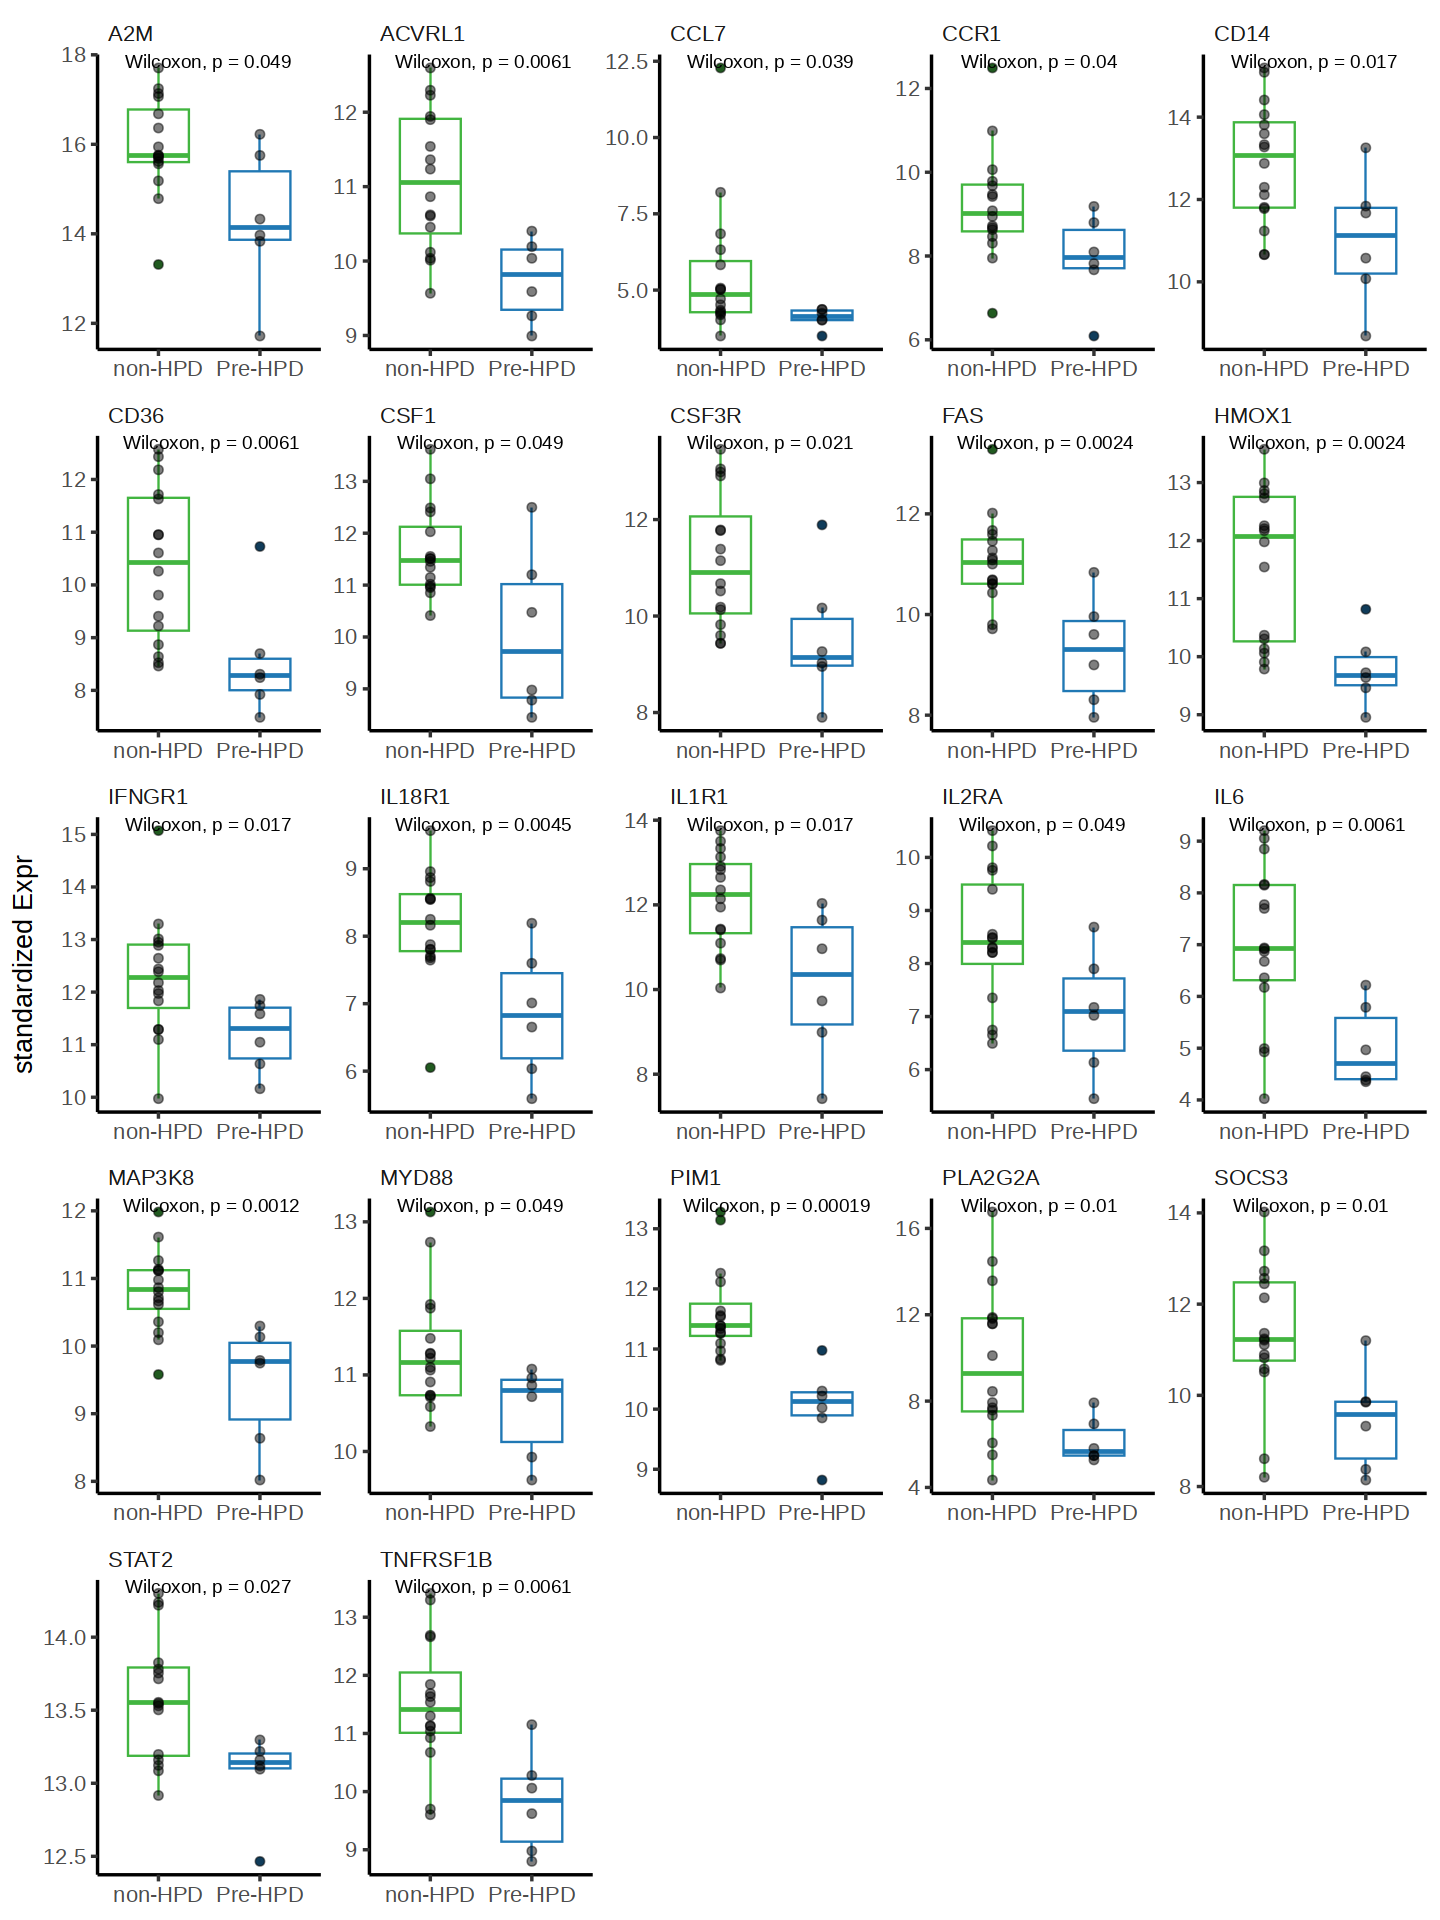

In [94]:
make.custom(12,16)

gg.3c.plus %>% ysave('fig3C+','sig_genes_expr',outputdir = OUTPUTROOT)
gg.3c.plus

In [95]:
gg.3c = normd %>% filter(symbol=='IL6') %>% 
    ggplot(aes(y=expr.Norm,x=Group,color=Group)) +
    geom_boxplot(fill=NA, width=0.6) +
    geom_point(size=2,color='black',alpha = 0.5) +
    scale_color_manual(values=COL_HPD) +
    theme_classic(base_size = 16) +
    theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none") +
    ylab('standardized Expr') +
    ggtitle('IL6') +
    ggpubr::stat_pvalue_manual(data = stat.3c %>% filter(symbol=='IL6'), label = 'p = {p.format}', size = 6)

[1] "[ 2023-01-30 05:56:34 ]  write 1 pdf at report_6hpd_vs_24nonHPD/fig3C_IL6_expr.pdf"


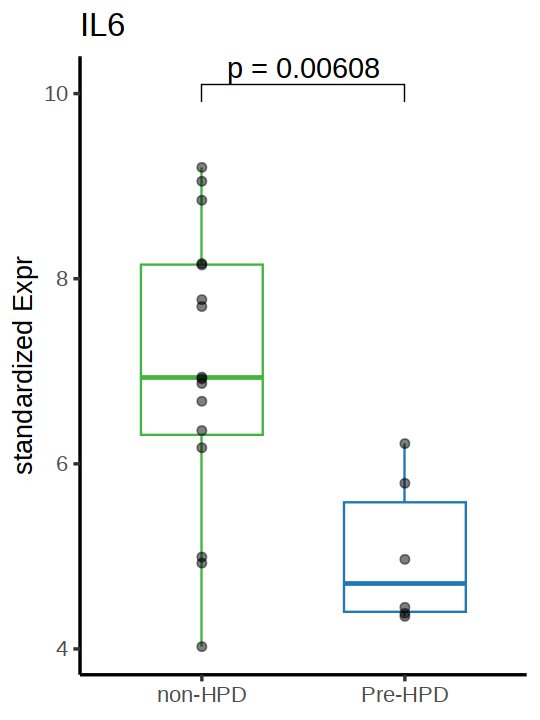

In [96]:
make.custom(4.5,6)
gg.3c %>% ysave('fig3C','IL6_expr',outputdir = OUTPUTROOT)
gg.3c

In [97]:
normd

symbol,tsb,expr.Norm,Group
<chr>,<chr>,<dbl>,<chr>
A2M,HPD_1,13.83264,Pre-HPD
A2M,HPD_2,13.97078,Pre-HPD
A2M,HPD_3,11.71739,Pre-HPD
⋮,⋮,⋮,⋮
TNFRSF1B,PD1_14,11.687853,non-HPD
TNFRSF1B,PD1_15,9.602691,non-HPD
TNFRSF1B,PD1_16,11.125169,non-HPD


In [98]:
data$fig3c.stat = stat.3c
data$fig3c.normd = normd

## EXPROT DATA

In [102]:
data$group_info_wes = glx
data$group_info_rna = rna_glx

In [113]:
data %>% ysave('DATA',outputdir = OUTPUTROOT)

[1] "[ 2023-01-30 06:05:54 ]  write 1 xlsx at report_6hpd_vs_24nonHPD/DATA.xlsx"
